In [1]:
import pandas as pd
from model import load_model, preprocess
import torch
import numpy as np

In [2]:
embeddings_df = pd.read_parquet("../parquets/openclip_vit_h_14.parquet")
hord_ratings = pd.read_parquet("../parquets/hord_diffusiondb_scores.parquet")
mixed_diffusion_df = pd.read_parquet("../parquets/prepared_hord_diffusion_dataset.parquet")
df = pd.merge(embeddings_df, mixed_diffusion_df, left_on="image_name", right_on="image_name")

model = load_model("aesthetics_scorer_openclip_vit_h_14.pth").to("cuda")


In [4]:
# Function to apply the model on a single row
def apply_model(row):
    embedding = torch.tensor(row["pooled_output"]).unsqueeze(0).to("cuda")
    embedding = preprocess(embedding)
    with torch.no_grad():
        output = model(embedding)
    return output.item()

# Apply the model on each row
df['predicted_rating'] = df.apply(apply_model, axis=1)

In [5]:
filtered = df
#filtered = filtered[filtered["predicted_rating"] > 8]
filtered = filtered[filtered["rating"] < 2]
filtered = filtered[abs(filtered["rating"] - filtered["predicted_rating"]) > 4]
#filtered[["image_name", "rating", "predicted_rating"]]

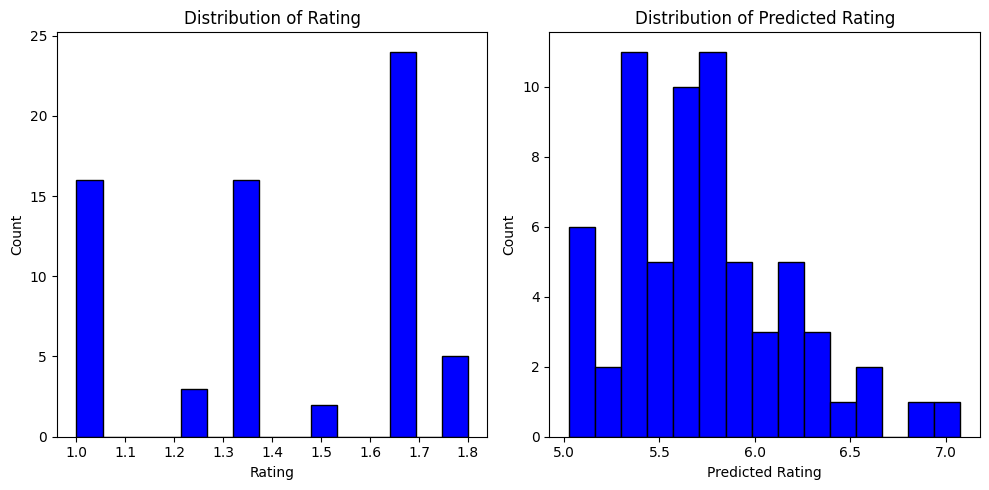

In [6]:
import matplotlib.pyplot as plt

def plot(plot_df):
    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    # Plot the first histogram on the first subplot
    ax1.hist(plot_df["rating"], bins=15, density=False, color='blue', edgecolor='black')
    ax1.set_xlabel('Rating')
    ax1.set_ylabel('Count')
    ax1.set_title('Distribution of Rating')

    # Plot the second histogram on the second subplot
    ax2.hist(plot_df["predicted_rating"], bins=15, density=False, color='blue', edgecolor='black')
    ax2.set_xlabel('Predicted Rating')
    ax2.set_ylabel('Count')
    ax2.set_title('Distribution of Predicted Rating')

    # Adjust the layout of the subplots
    fig.tight_layout()

    # Show the figure
    plt.show()

plot(filtered)

In [7]:
import ipyplot

images = [f"../dataset/{x}" for x in filtered["image_name"].values]
ipyplot.plot_images(images, img_width=250, max_images=300)
#ipyplot.plot_class_tabs(images, "rating", max_imgs_per_tab=10, img_width=150)
display(images)

['../dataset/006ff0bc-16cc-44be-8f7b-441e43c8d911.webp',
 '../dataset/01dad030-1289-43fd-8617-31e19d24784b.webp',
 '../dataset/02acf07e-8cb4-4320-ad72-a2ec0cb1d647.webp',
 '../dataset/034f9ac2-1985-4a5c-82f0-66b73c8ce5af.webp',
 '../dataset/06253c06-ed6e-4115-8c78-b3843f11a76a.webp',
 '../dataset/0a442707-d69d-4a45-bb35-e84912788afb.webp',
 '../dataset/0adb6b84-cc45-4336-9ce5-397f0847fc45.webp',
 '../dataset/0c2c4c18-c138-472b-acce-642600444499.webp',
 '../dataset/0d93bb0b-e1d6-47d2-81c7-34e63eeaf9a1.webp',
 '../dataset/0dc3dbb6-4c1b-455a-8c39-d5bb2afc0025.webp',
 '../dataset/0f17e255-0a6c-4566-b4b9-2c738f962167.webp',
 '../dataset/12749fd1-a16c-41f2-a790-50061a51f59a.webp',
 '../dataset/127b72e3-bfc5-436b-84af-23023aef3430.webp',
 '../dataset/12cc4f03-ab2f-4183-b71f-08711a1a7d8a.webp',
 '../dataset/13621096-91c1-4d67-9b14-1b7f5513cf58.webp',
 '../dataset/17f2f13a-8d3a-4908-962f-ab979c888315.webp',
 '../dataset/193b26c7-b111-4062-aaf2-6758c8f7debb.webp',
 '../dataset/1b0ee390-477e-4c66

In [29]:
hord_ratings[hord_ratings["id"] =="0d9bb899-1cd9-4f2e-93a6-03ecc0675698"]

,id,ratings_count,rating,kudos,account_age,usage_requests,created_at,client_agent,artifacts,trusted,country
36172,0d9bb899-1cd9-4f2e-93a6-03ecc0675698,5,10,42,71014,270,2023-01-18 23:59:13.966214,ArtBot:v.202301180729:(discord)rockbandit#4910,NaN,False,AU
205410,0d9bb899-1cd9-4f2e-93a6-03ecc0675698,5,10,1094,37707,0,2023-03-16 19:31:24.974744,StableUI:1.1:(discord)aqualxx#5004,1.0,False,US
208121,0d9bb899-1cd9-4f2e-93a6-03ecc0675698,5,10,49,11809,517,2023-02-08 00:44:35.140016,StableUI:1.0:(discord)aqualxx#5004,2.0,False,US
